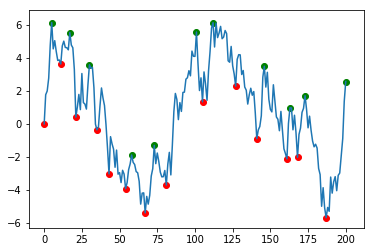

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import argrelextrema

# Generate a noisy AR(1) sample
np.random.seed(0)
rs = np.random.randn(200)
xs = [0]
for r in rs:
    xs.append(xs[-1]*0.9 + r)
df = pd.DataFrame(xs, columns=['data'])

n=5 # number of points to be checked before and after 
# Find local peaks
df['min'] = df.iloc[argrelextrema(df.data.values, np.less_equal, order=n)[0]]['data']
df['max'] = df.iloc[argrelextrema(df.data.values, np.greater_equal, order=n)[0]]['data']

# Plot results
plt.scatter(df.index, df['min'], c='r')
plt.scatter(df.index, df['max'], c='g')
plt.plot(df.index, df['data'])
plt.show()